<a href="https://colab.research.google.com/github/VishwajeetJa/Primetrade.Ai-Assignment/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

historical_df = pd.read_csv("/content/historical_data.csv")
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

In [ ]:
try:
    historical_df["full_timestamp"] = pd.to_datetime(historical_df["Timestamp"], unit="s")
except:
    historical_df["full_timestamp"] = pd.to_datetime(historical_df["Timestamp"], unit="ms")

try:
    sentiment_df["timestamp"] = pd.to_datetime(sentiment_df["timestamp"], unit="s")
except:
    sentiment_df["timestamp"] = pd.to_datetime(sentiment_df["timestamp"], unit="ms")


In [ ]:
historical_df["date"] = historical_df["full_timestamp"].dt.date
sentiment_df["date"] = sentiment_df["timestamp"].dt.date

print("Historical date range:", historical_df["date"].min(), "to", historical_df["date"].max())
print("Sentiment date range:", sentiment_df["date"].min(), "to", sentiment_df["date"].max())


Historical date range: 2023-03-28 to 2025-06-15
Sentiment date range: 2018-02-01 to 2025-05-02


In [ ]:
merged_df = pd.merge(historical_df, sentiment_df, on="date", how="left")
print("Merged Data Shape:", merged_df.shape)
print("Non-null classification count:", merged_df["classification"].notna().sum())

merged_df.to_csv("/content/merged_data.csv", index=False)
print("Merged CSV saved at /content/merged_data.csv")

Merged Data Shape: (211224, 21)
Non-null classification count: 184263
Merged CSV saved at /content/merged_data.csv


In [ ]:
print(historical_df["full_timestamp"].head(10))
print(sentiment_df["timestamp"].head(10))

0   2024-10-27 03:33:20
1   2024-10-27 03:33:20
2   2024-10-27 03:33:20
3   2024-10-27 03:33:20
4   2024-10-27 03:33:20
5   2024-10-27 03:33:20
6   2024-10-27 03:33:20
7   2024-10-27 03:33:20
8   2024-10-27 03:33:20
9   2024-10-27 03:33:20
Name: full_timestamp, dtype: datetime64[ns]
0   2018-02-01 05:30:00
1   2018-02-02 05:30:00
2   2018-02-03 05:30:00
3   2018-02-04 05:30:00
4   2018-02-05 05:30:00
5   2018-02-06 05:30:00
6   2018-02-07 05:30:00
7   2018-02-08 05:30:00
8   2018-02-09 05:30:00
9   2018-02-10 05:30:00
Name: timestamp, dtype: datetime64[ns]


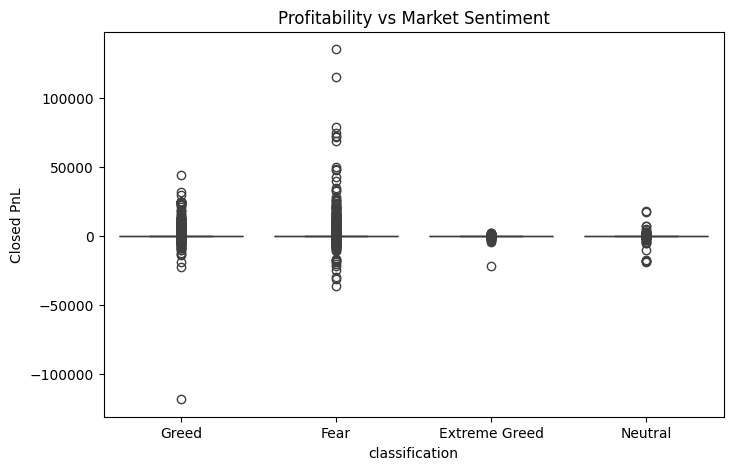

In [ ]:
if "classification" in merged_df.columns:
    plot_df = merged_df.dropna(subset=["classification", "Closed PnL"]).copy()
    plot_df["Closed PnL"] = pd.to_numeric(plot_df["Closed PnL"], errors="coerce")

    if not plot_df.empty:
        plt.figure(figsize=(8,5))
        sns.boxplot(data=plot_df, x='classification', y='Closed PnL')
        plt.title("Profitability vs Market Sentiment")
        plt.savefig("/content/profit_vs_sentiment.png")
        plt.show()
    else:
        print("No valid data for Profitability vs Market Sentiment plot.")

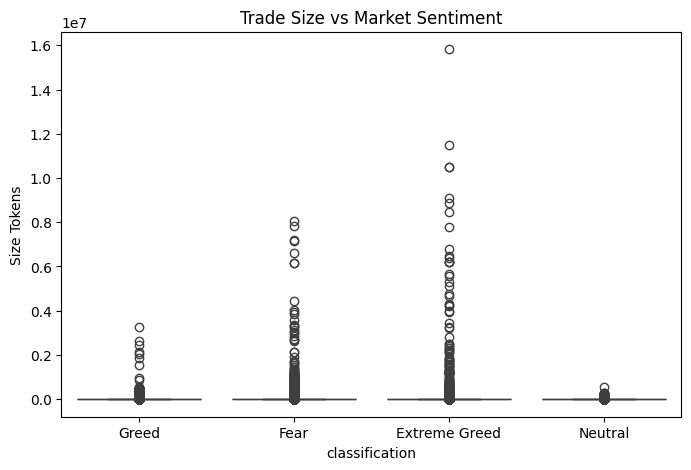

In [ ]:
plot_df_size = merged_df.dropna(subset=["classification", "Size Tokens"]).copy()
plot_df_size["Size Tokens"] = pd.to_numeric(plot_df_size["Size Tokens"], errors="coerce")

if not plot_df_size.empty:
        plt.figure(figsize=(8,5))
        sns.boxplot(data=plot_df_size, x='classification', y='Size Tokens')
        plt.title("Trade Size vs Market Sentiment")
        plt.savefig("/content/trade_size_vs_sentiment.png")
        plt.show()
else:
        print("⚠ No valid data for Trade Size vs Market Sentiment plot.")
